# Organizational Employee Attrition Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.svm import SVC
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM EMPLOYEE PERFORMANCE ANALYTICS/ibm-employee-data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

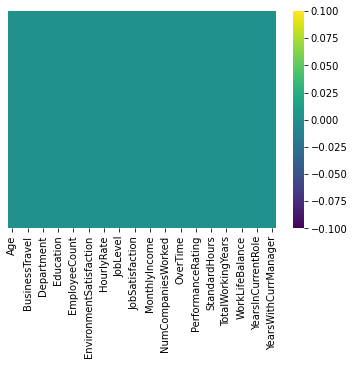

In [6]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.describe(include=[object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
abc=df[['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
        'RelationshipSatisfaction','WorkLifeBalance']]
abc.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


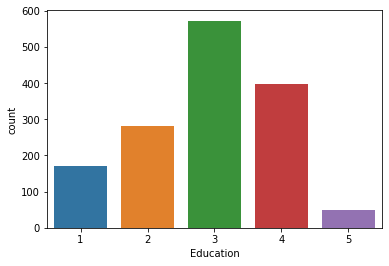

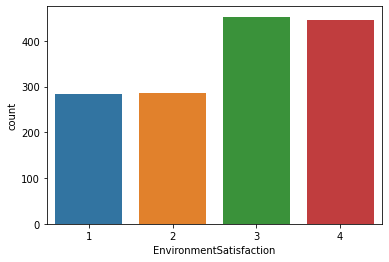

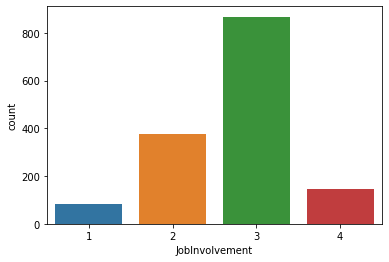

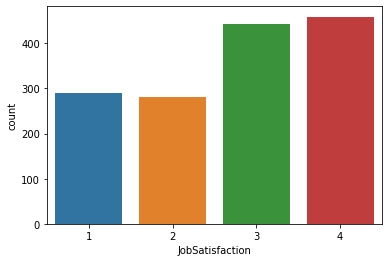

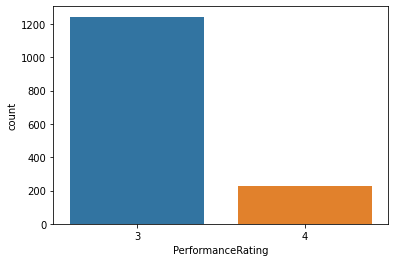

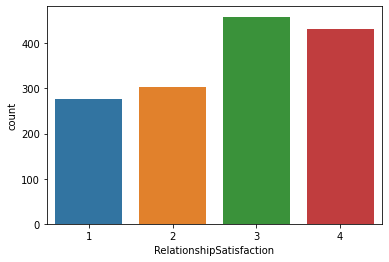

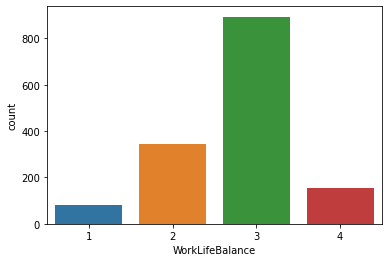

In [14]:
for col in abc:
  print('===============================================')
  sns.countplot(abc[col])
  plt.show()

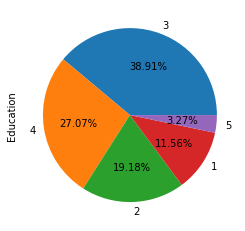

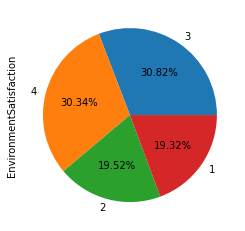

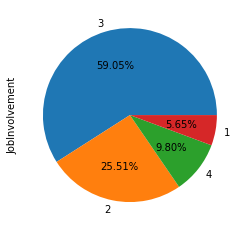

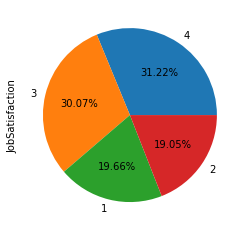

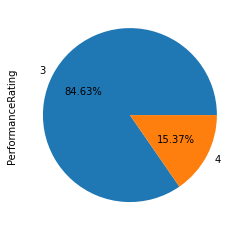

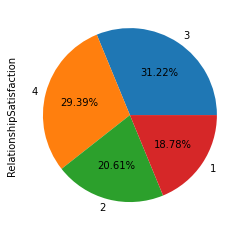

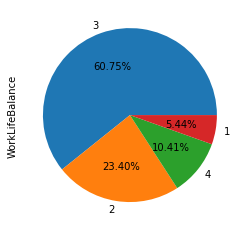

In [15]:
for col in abc:
  print('===============================================')
  abc[col].value_counts().head().plot(kind="pie",autopct="%.2f%%")
  plt.show()

In [16]:
df_cat = df.select_dtypes(["object","bool"])
df_num = df.select_dtypes(["float64","int64"])

In [17]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


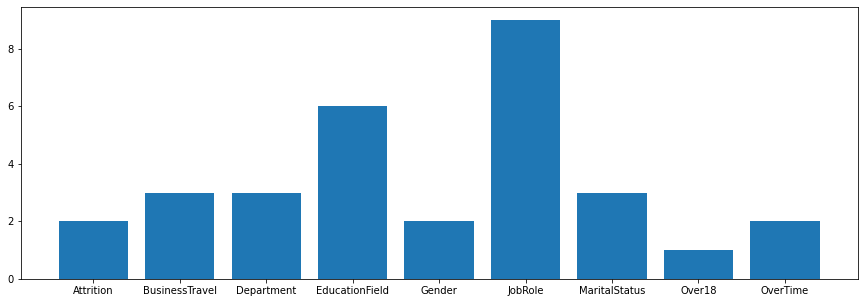

In [18]:
plt.figure(figsize=(15,5))
plt.bar(df_cat.columns,df_cat.nunique())
plt.show()

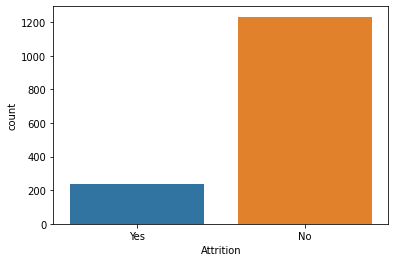

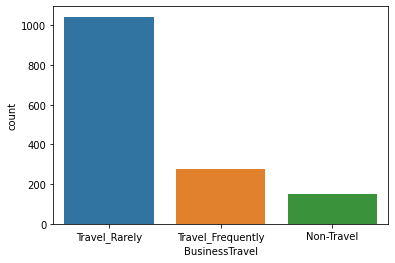

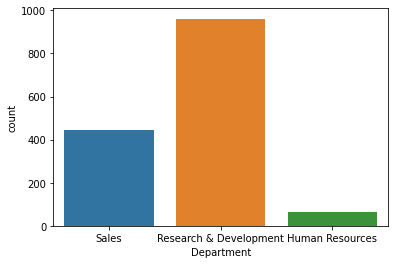

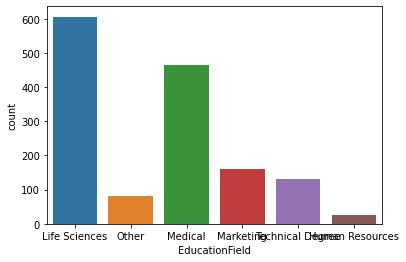

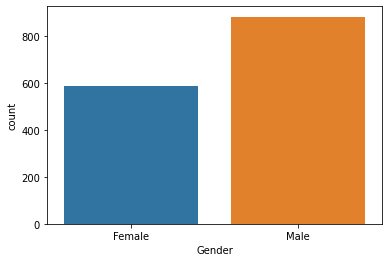

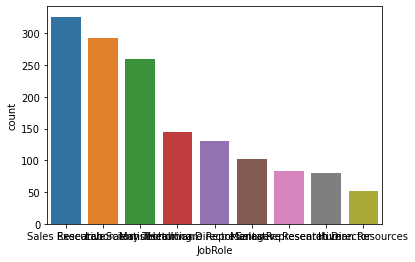

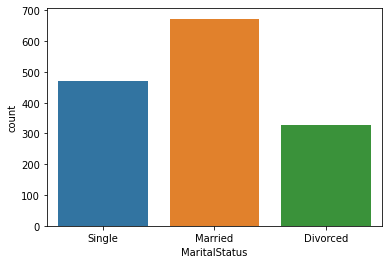

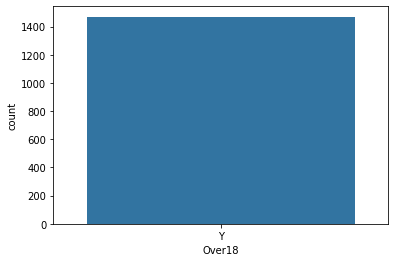

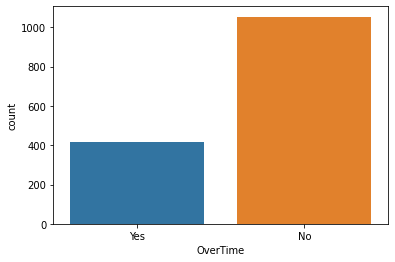

In [21]:
for col in df_cat:
  print('===============================================')
  sns.countplot(df_cat[col],orient="h")
  plt.show()

In [22]:
df_cat['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

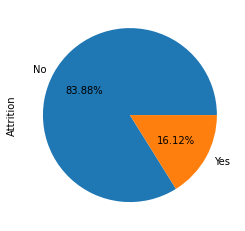

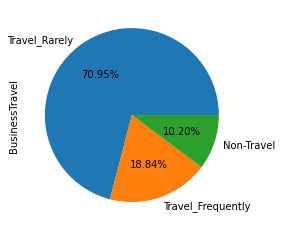

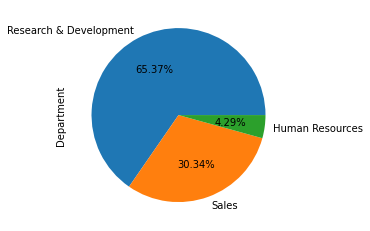

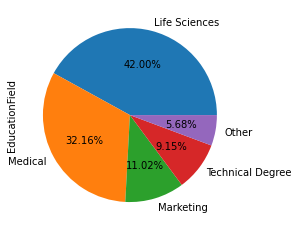

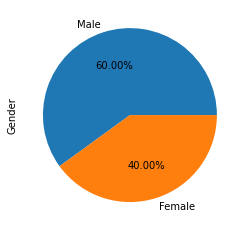

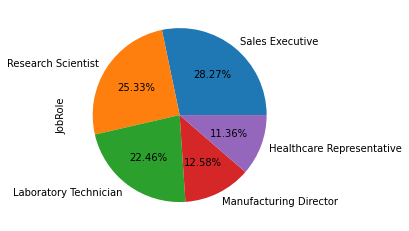

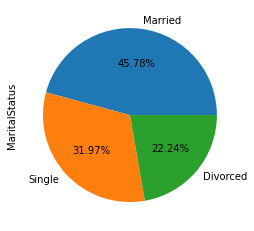

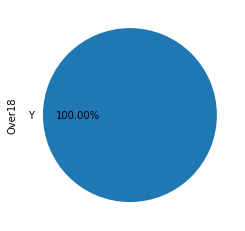

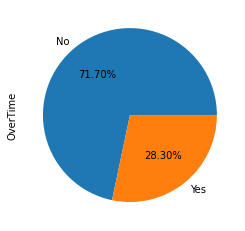

In [23]:
for col in df_cat:
  print('===============================================')
  df_cat[col].value_counts().head().plot(kind="pie",autopct="%.2f%%")
  plt.show()

#### Data Encoding

In [24]:
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [25]:
oe=OrdinalEncoder()
df_cat[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]=oe.fit_transform(df_cat)

In [26]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1.0,2.0,2.0,1.0,0.0,7.0,2.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0
2,1.0,2.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0
3,0.0,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0
4,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0


In [27]:
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


Age
Skewness: 0.41286446154785084


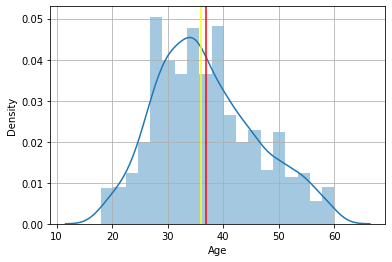

DailyRate
Skewness: -0.003514976958291024


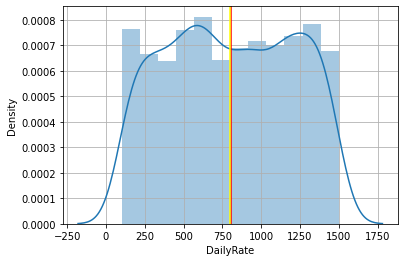

DistanceFromHome
Skewness: 0.9571400469829039


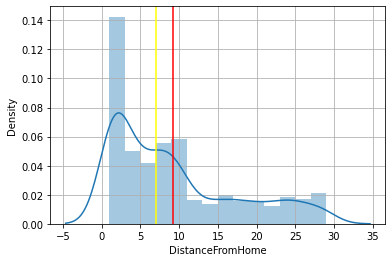

Education
Skewness: -0.2893854052028825


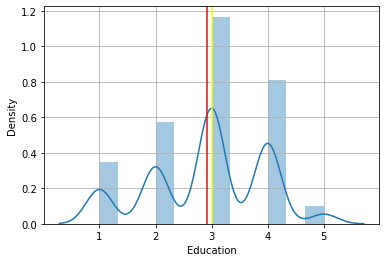

EmployeeCount
Skewness: 0.0


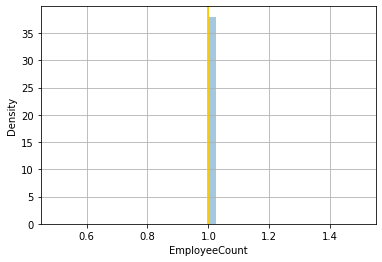

EmployeeNumber
Skewness: 0.01655710251921753


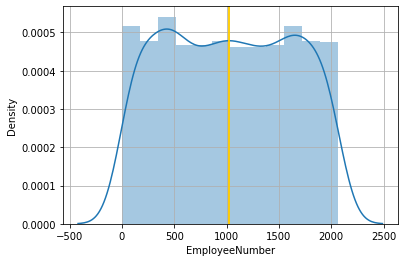

EnvironmentSatisfaction
Skewness: -0.3213261358382832


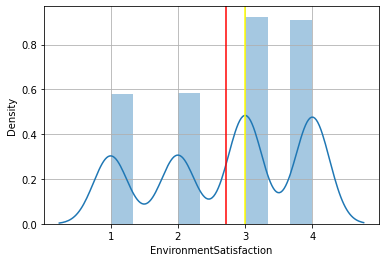

HourlyRate
Skewness: -0.03227797319055416


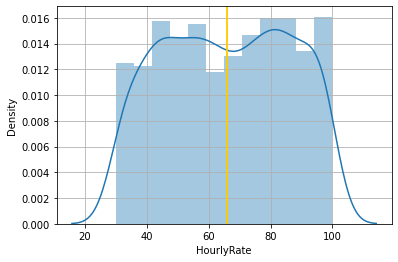

JobInvolvement
Skewness: -0.4979106286269671


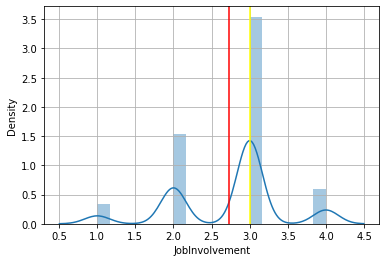

JobLevel
Skewness: 1.0243546583925869


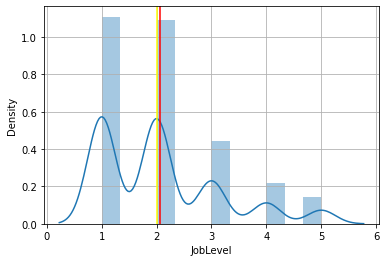

JobSatisfaction
Skewness: -0.3293354633089524


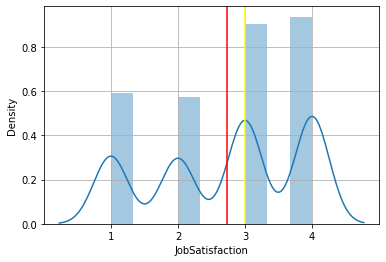

MonthlyIncome
Skewness: 1.3684185123330814


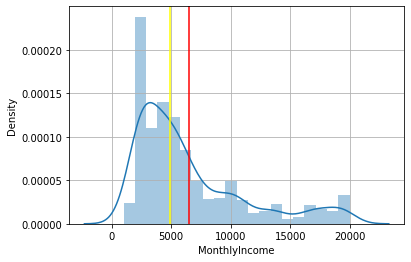

MonthlyRate
Skewness: 0.01855884556846042


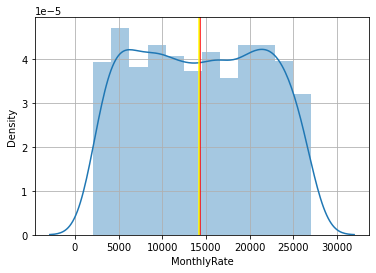

NumCompaniesWorked
Skewness: 1.0254233954371303


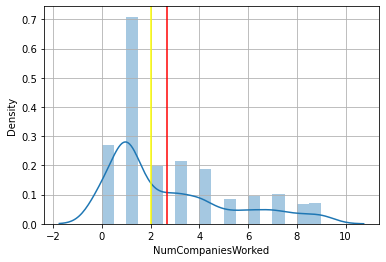

PercentSalaryHike
Skewness: 0.8202898522796266


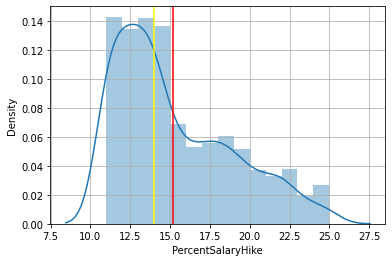

PerformanceRating
Skewness: 1.9199210412109473


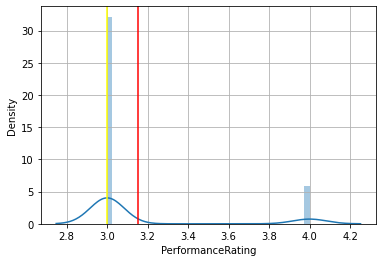

RelationshipSatisfaction
Skewness: -0.3025184698222079


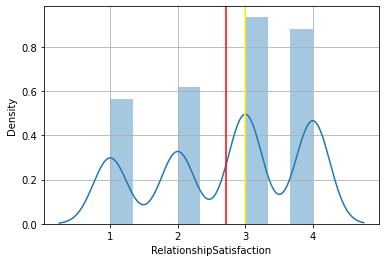

StandardHours
Skewness: 0.0


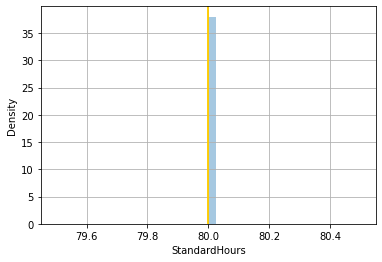

StockOptionLevel
Skewness: 0.9679912809556104


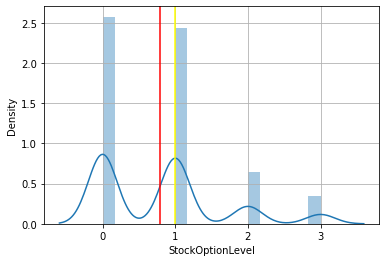

TotalWorkingYears
Skewness: 1.11603155825941


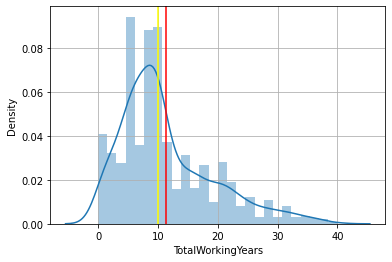

TrainingTimesLastYear
Skewness: 0.5525595985771926


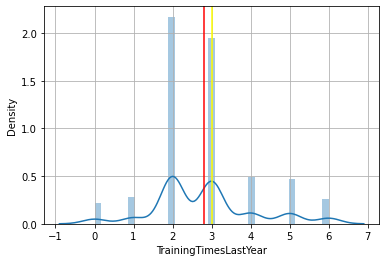

WorkLifeBalance
Skewness: -0.5519163838185224


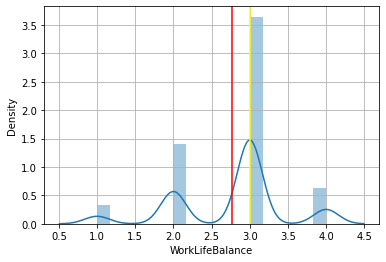

YearsAtCompany
Skewness: 1.7627284034822992


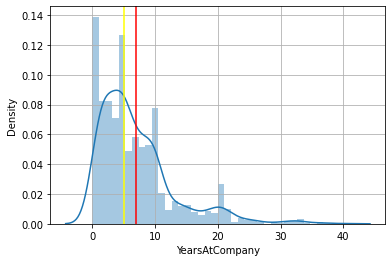

YearsInCurrentRole
Skewness: 0.9164268059808774


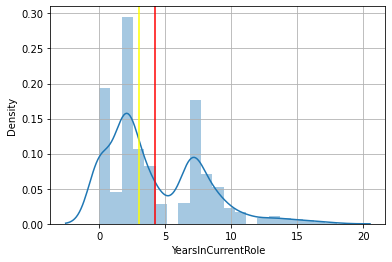

YearsSinceLastPromotion
Skewness: 1.982264623462895


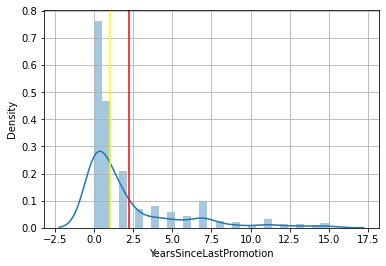

YearsWithCurrManager
Skewness: 0.8326002906209379


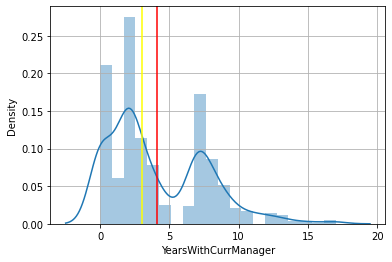

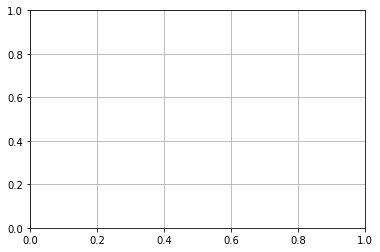

In [28]:
for col in df_num:
  print(col)
  print(f"Skewness: {skew(df_num[col])}")
  mwidth=df_num[col].mean()
  dwidth=df_num[col].median()
  plt.figure()
  sns.distplot(df_num[col])
  plt.axvline(mwidth,color="red")
  plt.axvline(dwidth,color="yellow")
  plt.grid(True)
  plt.show()
plt.grid(True)

In [29]:
df=pd.concat([df_num,df_cat],axis=1)

In [31]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1.0,2.0,2.0,1.0,0.0,7.0,2.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,7,0.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1.0,2.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0,0.0,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,2,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0


In [32]:
df.corr()["Attrition"].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

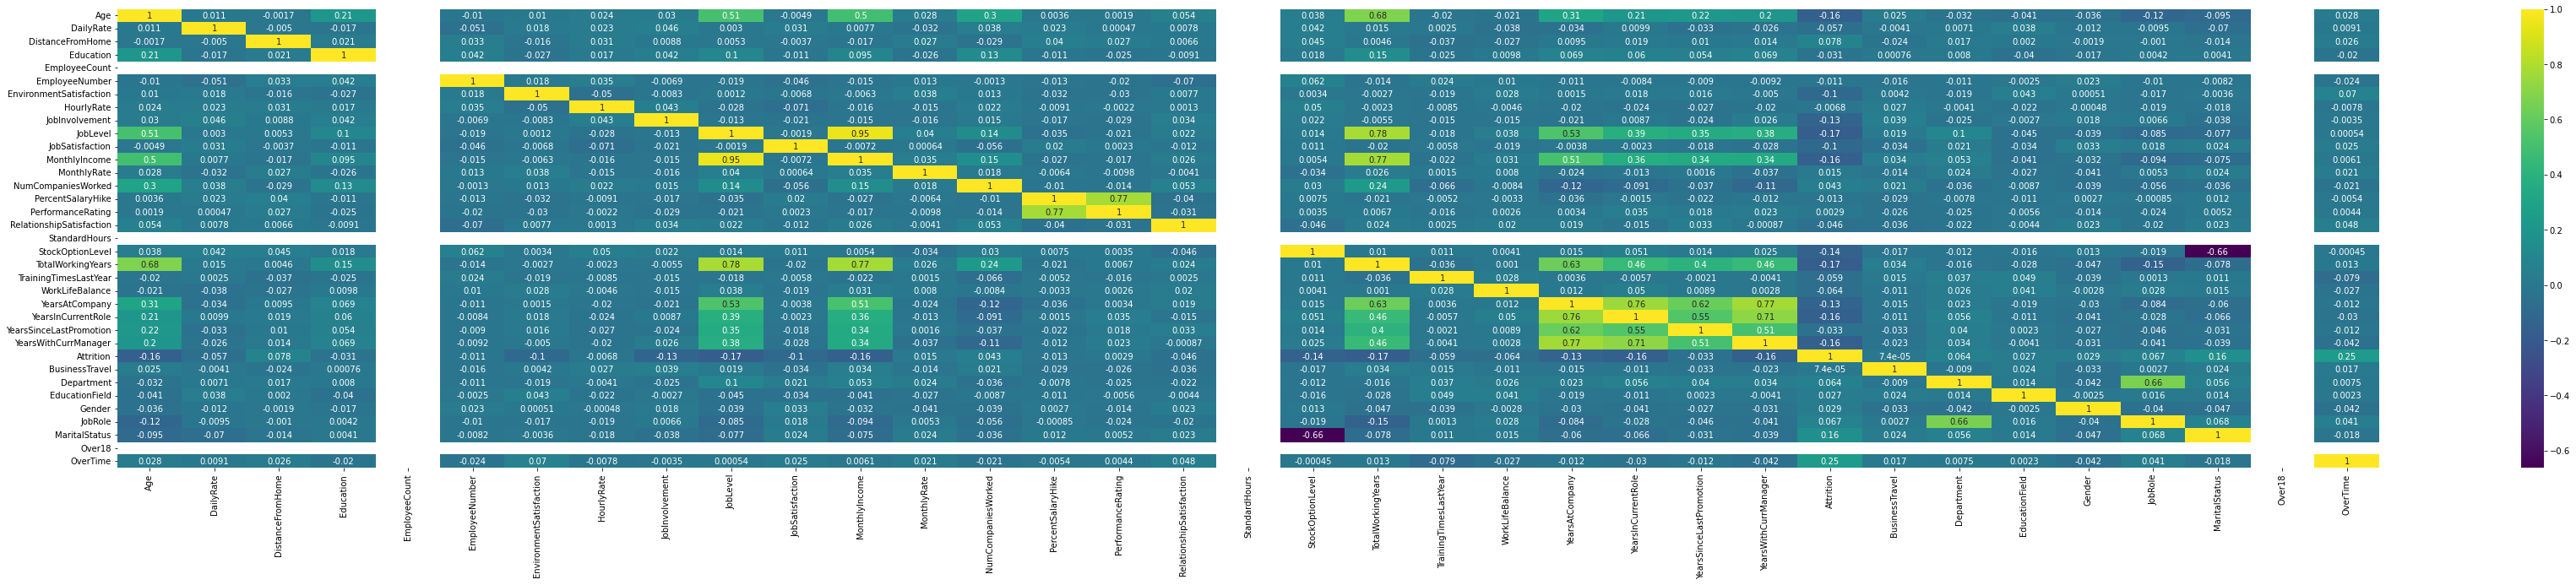

In [34]:
plt.figure(figsize=(60,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [35]:
x=df.loc[ : ,['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']]
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,0,5,2.0,2.0,1.0,0.0,7.0,2.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,1,7,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,2.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,3,0,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,2,2,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0


In [36]:
y=df.loc[ : ,'Attrition']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

#### SMOTE technique to solve Dependant variable imbalance

In [37]:
over_samp= SMOTE(sampling_strategy = 0.85) #category 1-'Yes' is only 237 out of a total 1470 almost equaling 15% of total
aa = [('over_samp', over_samp)]
pipeline = Pipeline(steps=aa)
x,y = pipeline.fit_resample(x, y)

#### Feature Selection

[0.02562014 0.02067013 0.02180705 0.02402112 0.         0.02108987
 0.04676296 0.0196652  0.04384814 0.03970909 0.05434679 0.03192827
 0.02214189 0.01973094 0.01775539 0.01142422 0.03655073 0.
 0.05000022 0.02883412 0.02148864 0.03032244 0.02585756 0.03462443
 0.0175229  0.02901748 0.03144346 0.03342088 0.02012829 0.02920874
 0.02453303 0.04376597 0.         0.1227599 ]


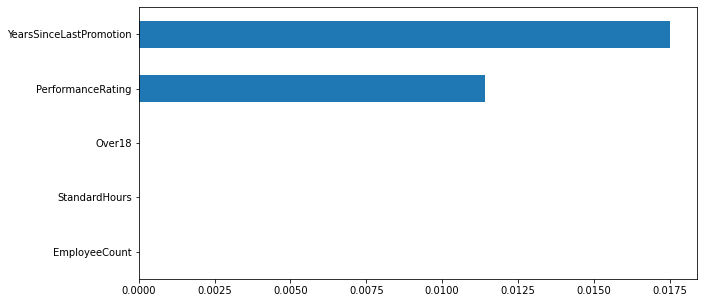

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
plt.figure(figsize=(10,5))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nsmallest(5).plot(kind='barh')
plt.show()

[0.02559886 0.01970866 0.02053554 0.02414897 0.         0.02056738
 0.04441047 0.02037133 0.0410323  0.03696034 0.05435621 0.03112711
 0.02114914 0.01905496 0.01714254 0.01186293 0.03872259 0.
 0.0534685  0.03063086 0.02268557 0.03215611 0.025858   0.03010055
 0.01761727 0.03118765 0.03433794 0.03126277 0.02361022 0.02807011
 0.02567455 0.04172173 0.         0.12486882]


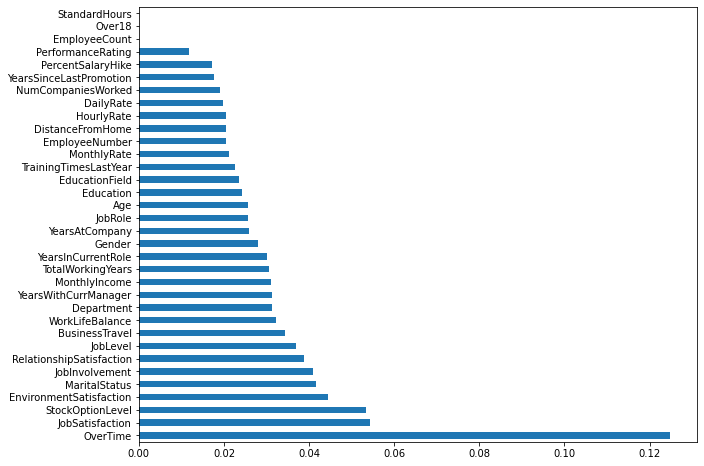

In [39]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,8))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

#### X and Y split

In [40]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,0,5,2.0,2.0,1.0,0.0,7.0,2.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,1,7,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,2.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,3,0,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,2,2,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0


In [41]:
x.drop(['Over18','StandardHours','EmployeeCount'],axis=1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,4,0,5,2.00000,2.000000,1.000000,0.000000,7.000000,2.000000,1.00000
1,49,279,8,1,2,3,61,2,2,2,...,7,1,7,1.00000,1.000000,1.000000,1.000000,6.000000,1.000000,0.00000
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,2.00000,1.000000,4.000000,1.000000,2.000000,2.000000,1.00000
3,33,1392,3,4,5,4,56,3,1,3,...,7,3,0,1.00000,1.000000,1.000000,0.000000,6.000000,1.000000,1.00000
4,27,591,2,1,7,1,40,3,1,2,...,2,2,2,2.00000,1.000000,3.000000,1.000000,2.000000,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,49,667,3,1,968,3,61,2,1,3,...,0,0,0,0.78726,1.000000,1.425480,1.000000,2.000000,0.425480,0.78726
2277,31,891,3,1,1659,1,35,1,2,1,...,1,0,1,2.00000,2.000000,1.000000,0.868991,7.000000,1.868991,0.00000
2278,33,298,11,2,507,3,42,1,1,2,...,2,1,0,1.00000,1.760635,2.239365,0.239365,6.563810,0.478730,0.00000
2279,31,773,10,3,1050,3,69,3,1,3,...,4,3,3,1.28842,1.000000,3.288420,1.000000,3.153679,1.288420,0.28842


#### Train-Test Split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
print(f"Xtrain: {xtrain.shape}")
print(f"Xtest: {xtest.shape}")
print(f"Ytrain: {ytrain.shape}")
print(f"Ytest: {ytest.shape}")

Xtrain: (1596, 34)
Xtest: (685, 34)
Ytrain: (1596,)
Ytest: (685,)


#### Feature Scaling

In [44]:
mm=MinMaxScaler()
xtrain=mm.fit_transform(xtrain)
xtest=mm.fit_transform(xtest)

#### Model Building

In [45]:
classifiers=[]

In [46]:
model1 = KNeighborsClassifier()
classifiers.append(model1)
model2 = LogisticRegression() 
classifiers.append(model2)
model3 = GaussianNB()
classifiers.append(model3)
model4 = xgboost.XGBClassifier()
classifiers.append(model4)
model5 = svm.SVC()
classifiers.append(model5)
model6 = tree.DecisionTreeClassifier()
classifiers.append(model6)
model7 = RandomForestClassifier()
classifiers.append(model7)

In [47]:
classifiers

[KNeighborsClassifier(),
 LogisticRegression(),
 GaussianNB(),
 XGBClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [48]:
for clf in classifiers:
    clf.fit(xtrain, ytrain)
    ypred= clf.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    clrep=classification_report(ytest,ypred)
    print("\n\nAccuracy of %s is %s"%(clf, acc))
    print("\n\nClassification Report: \n%s"%(clrep))
    cm = confusion_matrix(ytest, ypred)
    print("Confusion Matrix of %s is\n %s"
          %(clf, cm))
    print("--------------------------------------------------------------------------")



Accuracy of KNeighborsClassifier() is 0.8248175182481752


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82       377
         1.0       0.74      0.94      0.83       308

    accuracy                           0.82       685
   macro avg       0.84      0.84      0.82       685
weighted avg       0.85      0.82      0.82       685

Confusion Matrix of KNeighborsClassifier() is
 [[274 103]
 [ 17 291]]
--------------------------------------------------------------------------


Accuracy of LogisticRegression() is 0.8116788321167884


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       377
         1.0       0.79      0.79      0.79       308

    accuracy                           0.81       685
   macro avg       0.81      0.81      0.81       685
weighted avg       0.81      0.81      0.81       685

Confusion Matrix of LogisticRegre

#### Cross Validation

In [49]:
for clf in classifiers:
    cvs=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
    print(clf)
    print(f"CVS: {cvs}\n")
    print(f"CVS Mean: {cvs.mean()}\n")
    print(f"CVS Standard Deviation: {cvs.std()}")
    print("---------------------------------------------")

KNeighborsClassifier()
CVS: [0.71115974 0.74780702 0.69517544 0.72368421 0.73026316]

CVS Mean: 0.7216179123958694

CVS Standard Deviation: 0.017739543007934507
---------------------------------------------
LogisticRegression()
CVS: [0.54704595 0.5877193  0.6622807  0.69736842 0.51754386]

CVS Mean: 0.6023916465123421

CVS Standard Deviation: 0.06794829989876586
---------------------------------------------
GaussianNB()
CVS: [0.65207877 0.74122807 0.73903509 0.74561404 0.71052632]

CVS Mean: 0.7176964566777995

CVS Standard Deviation: 0.03505868312467885
---------------------------------------------
XGBClassifier()
CVS: [0.63238512 0.7872807  0.76754386 0.81140351 0.47149123]

CVS Mean: 0.6940208837191447

CVS Standard Deviation: 0.1274363506093781
---------------------------------------------
SVC()
CVS: [0.53610503 0.61842105 0.60745614 0.60307018 0.48903509]

CVS Mean: 0.5708174977926217

CVS Standard Deviation: 0.050084012616478116
---------------------------------------------
Decis

In [50]:
import joblib
for clf in classifiers:
  joblib.dump(clf,f'{clf}.sav')